# Topic 4: The Solow growth model

This notebook uses the Penn World Table database to plot cross-country comparisons for growth episodes and associated investment rates. The database with its latest <a href="https://www.rug.nl/ggdc/productivity/pwt/">PWT 10.01</a> version is hosted and updated by the University of Groningen.

In [1]:
# render graphs within notebook - may want to uncomment the next line for older versions of Jupyter
# %matplotlib inline

# import relevant packages
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import datetime
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# load econutil package with some frequently used functions
import econutil as ec

Root package econutil imported.


In [2]:
today = datetime.date.today().strftime('%d %B %Y')
print('Last update:',today)

Last update: 22 September 2025


# Penn World Tables cross-country comparison

In [3]:
# load PWT 10.0
# data_PWT = pd.read_excel('https://www.rug.nl/ggdc/docs/pwt100.xlsx',sheet_name='Data')
# load PWT 10.01
data_PWT = pd.read_excel('https://dataverse.nl/api/access/datafile/354095',sheet_name='Data')

## GDP growth rates and investment rates

Process PWT data.

In [4]:
countries_PWT = ['United States','Japan','Taiwan','Republic of Korea','China','India']
countries = ['U.S.','Japan','Taiwan','South Korea','China','India']
year_start = [1950,1950,1950,1965,1980,1995]
year_min = np.min(data_PWT['year'])
year_max = np.max(data_PWT['year'])
GDP_data = np.empty(len(countries)*(year_max-year_min+1))
GDP_data = np.reshape(GDP_data,[year_max-year_min+1,len(countries)])
inv_data = np.array(GDP_data)
pop_data = np.array(GDP_data)
emp_data = np.array(GDP_data)
GDPpop_data = np.array(GDP_data)
GDPemp_data = np.array(GDP_data)

years = np.linspace(year_min,year_max,year_max-year_min+1)

for ind,c in enumerate(countries_PWT):
    GDP_data[:,ind] = (data_PWT['cgdpo'][data_PWT['country']==c].to_numpy())
    emp_data[:,ind] = (data_PWT['emp'][data_PWT['country']==c].to_numpy())
    pop_data[:,ind] = (data_PWT['pop'][data_PWT['country']==c].to_numpy())
    inv_data[:,ind] = (data_PWT['csh_i'][data_PWT['country']==c].to_numpy())
    GDPpop_data[:,ind] = GDP_data[:,ind] / pop_data[:,ind];
    GDPemp_data[:,ind] = GDP_data[:,ind] / emp_data[:,ind];

GDP evolution.

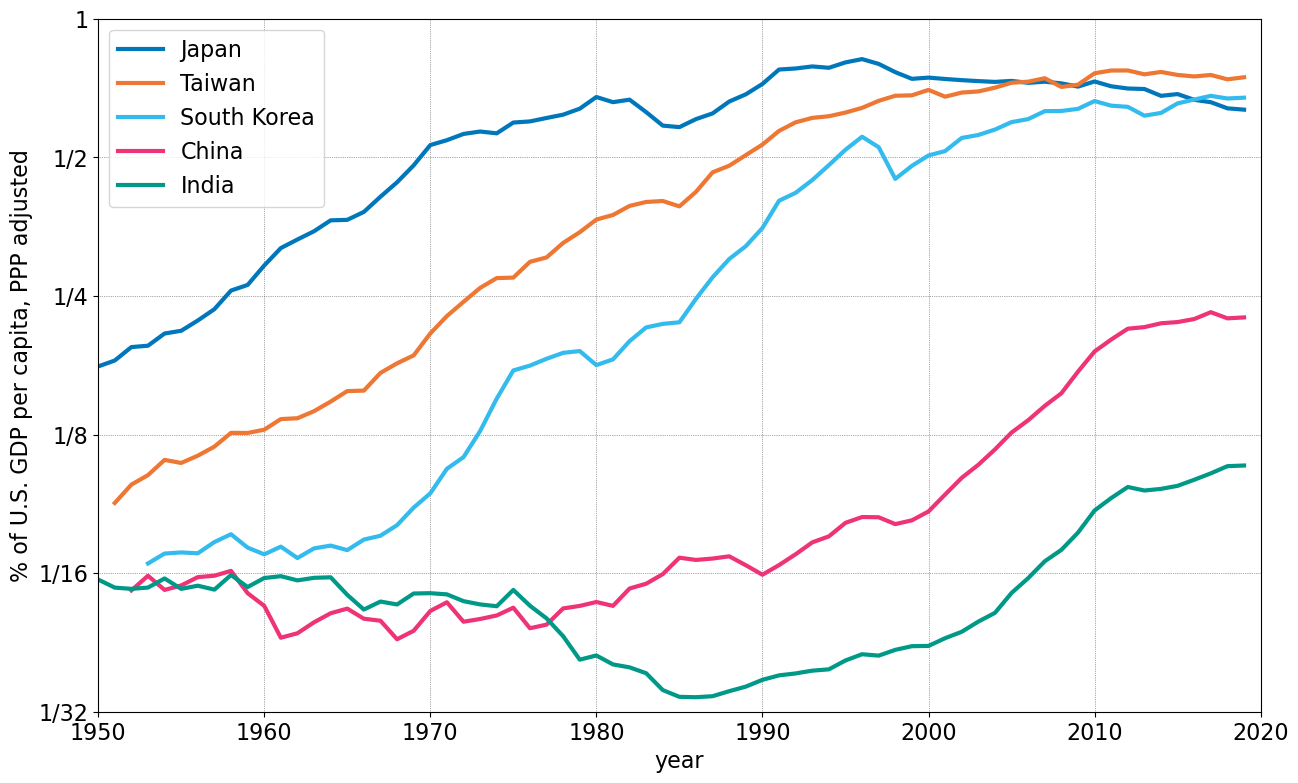

In [5]:
param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1950,2020], 'ylim': [1/32,1],
         'xlabel': 'year', 'ylabel': '% of U.S. GDP per capita, PPP adjusted',
         'ylogscale': True,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [11000,20000]}

fig,ax = ec.GenerateTSPlot(param)
ax.minorticks_off()
ytick_exps = np.linspace(-5,0,6)
ytick_labels = ['1/'+str(int(pow)) for pow in (1/2)**ytick_exps]
ytick_labels[-1] = '1'
ax.set_yticks(2**ytick_exps)
ax.set_yticklabels(ytick_labels)

for ind,c in enumerate(countries):
    if ind > 0:
        ax.plot(years,GDPpop_data[:,ind]/GDPpop_data[:,0],
                    linewidth=3,marker='',color=ec.clist_vibrant[ind-1],label=c)
x = ax.legend(loc='upper left')

Investment rates (gross capital formation as a share of GDP).

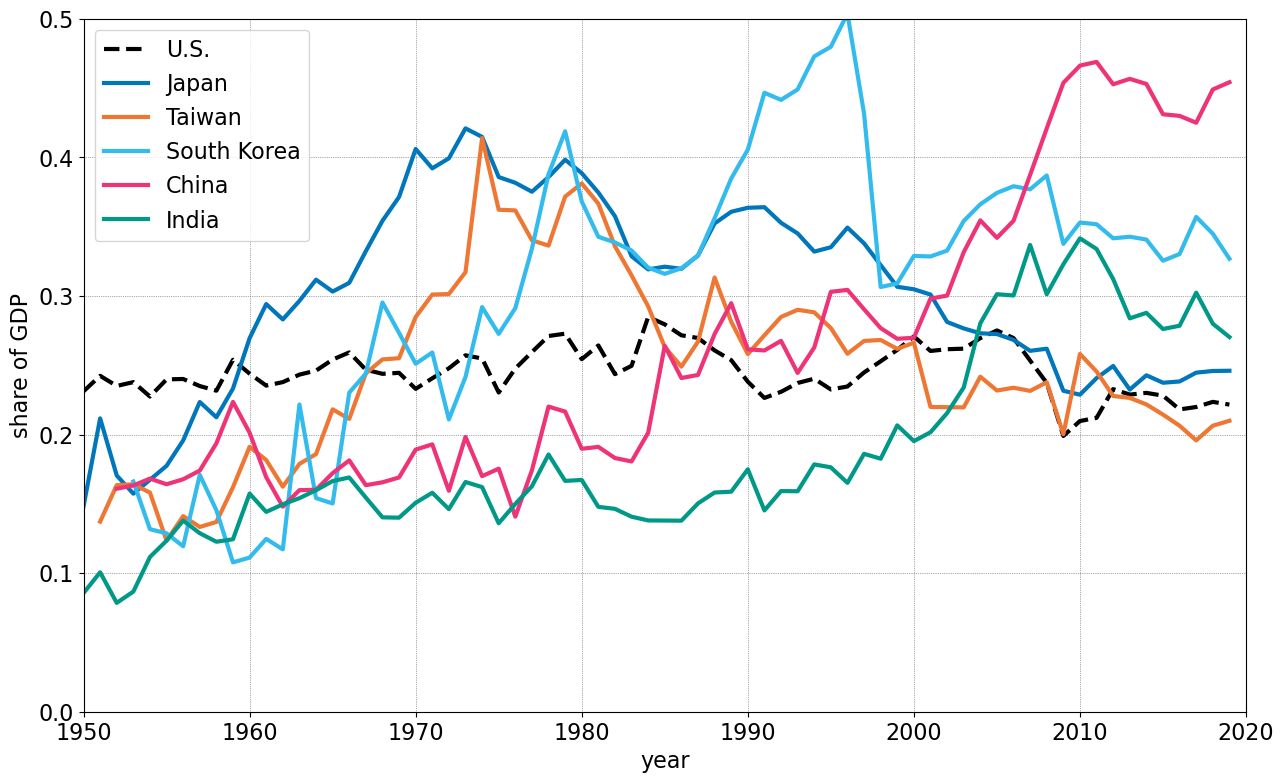

In [6]:
param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1950,2020], 'ylim': [0,0.5],
         'xlabel': 'year', 'ylabel': 'share of GDP',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [11000,20000]}

fig,ax = ec.GenerateTSPlot(param)

for ind,c in enumerate(countries):
    if ind > 0:
        ax.plot(years,inv_data[:,ind],
                    linewidth=3,marker='',color=ec.clist_vibrant[ind-1],label=c)
    else:
        ax.plot(years,inv_data[:,ind],
                    linewidth=3,linestyle='--',marker='',color='k',label=c)
        
x = ax.legend(loc='upper left')

GDP relative to the U.S. since the start of the growth period.

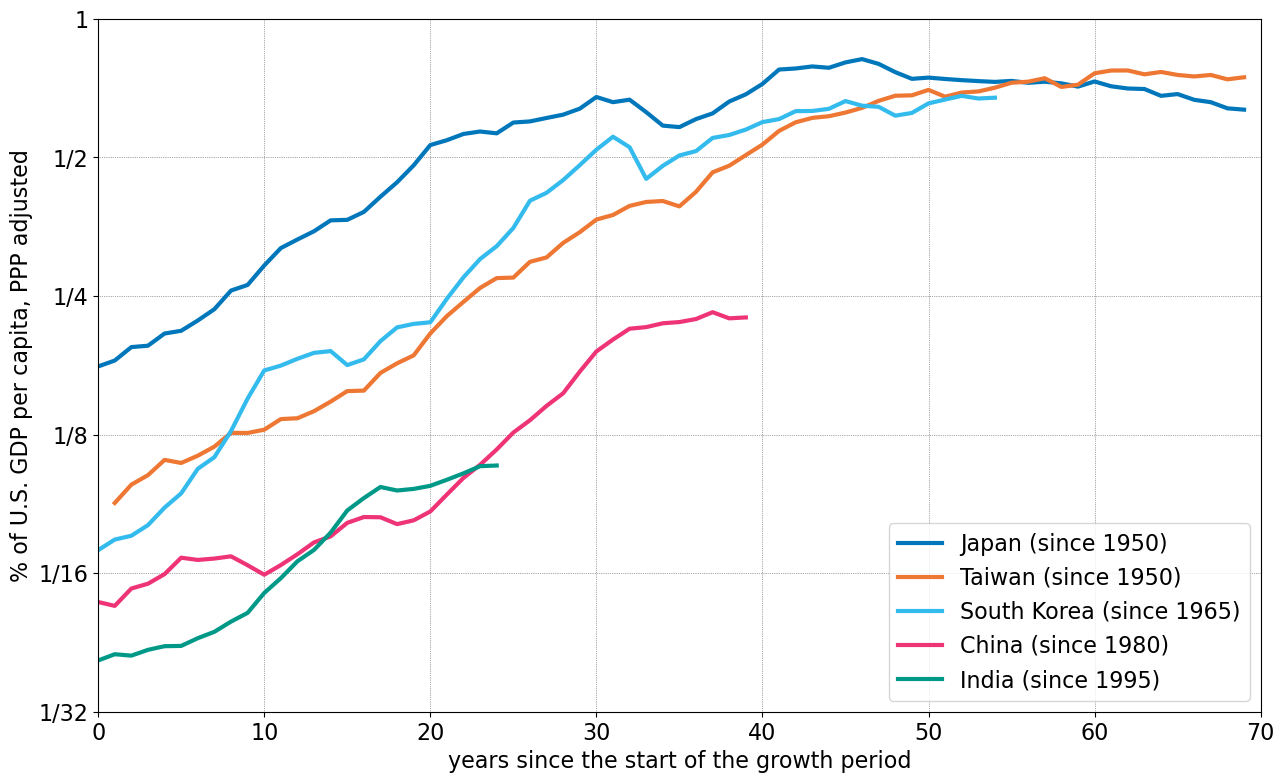

In [7]:
param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [0,70], 'ylim': [1/32,1],
         'xlabel': 'years since the start of the growth period', 'ylabel': '% of U.S. GDP per capita, PPP adjusted',
         'ylogscale': True,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [11000,20000]}

fig,ax = ec.GenerateTSPlot(param)
ax.minorticks_off()
ytick_exps = np.linspace(-5,0,6)
ytick_labels = ['1/'+str(int(pow)) for pow in (1/2)**ytick_exps]
ytick_labels[-1] = '1'
ax.set_yticks(2**ytick_exps)
ax.set_yticklabels(ytick_labels)

for ind,c in enumerate(countries):
    if ind > 0:
        years_cur = np.linspace(0,year_max-year_start[ind],year_max-year_start[ind]+1)
        data = GDPpop_data[year_start[ind]-year_min:,ind] / GDPpop_data[year_start[ind]-year_min:,0]
        ax.plot(years_cur,data,
                    linewidth=3,marker='',color=ec.clist_vibrant[ind-1],label=c + ' (since ' + str(year_start[ind]) + ')')
        
x = ax.legend(loc='lower right')

Investment rates since the start of the growth period.

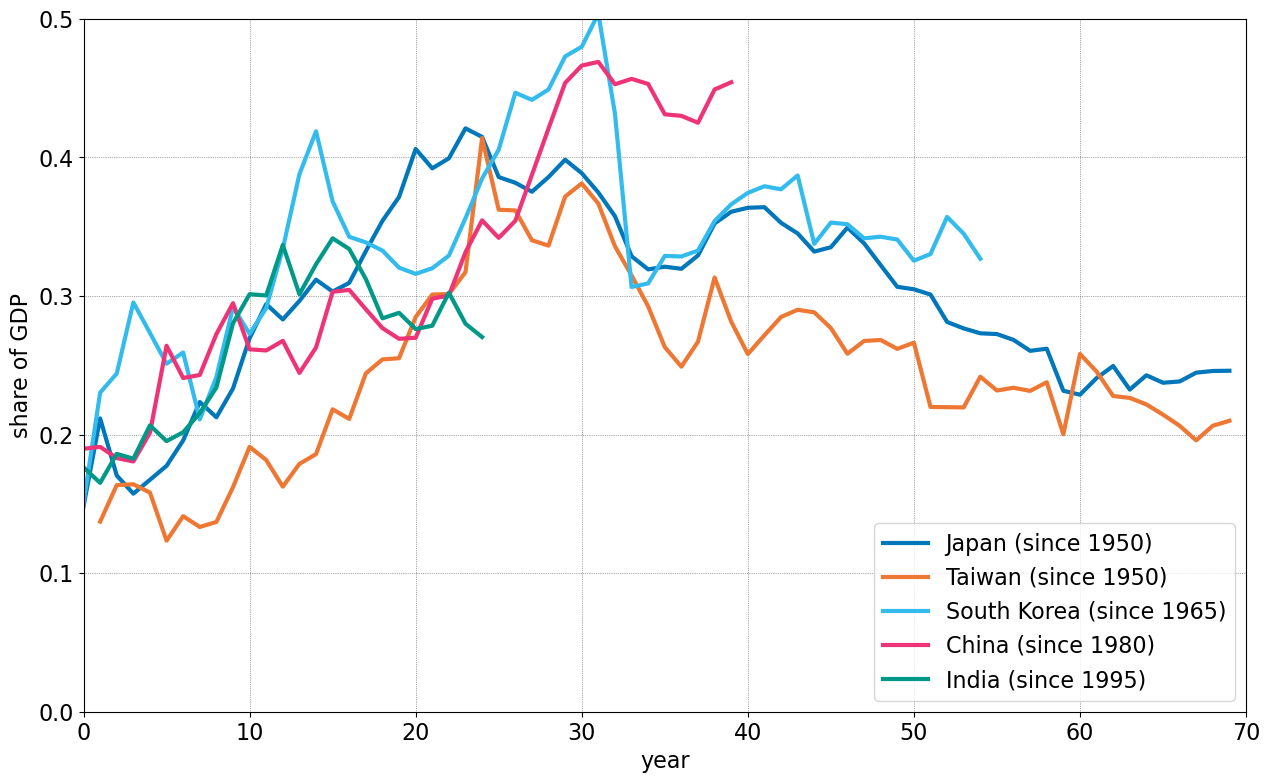

In [8]:
param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [0,70], 'ylim': [0,0.5],
         'xlabel': 'year', 'ylabel': 'share of GDP',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [11000,20000]}

fig,ax = ec.GenerateTSPlot(param)

for ind,c in enumerate(countries):
    if ind > 0:
        years_cur = np.linspace(0,year_max-year_start[ind],year_max-year_start[ind]+1)
        data = inv_data[year_start[ind]-year_min:,ind]
        ax.plot(years_cur,data,
                    linewidth=3,marker='',color=ec.clist_vibrant[ind-1],label=c + ' (since ' + str(year_start[ind]) + ')')
        
x = ax.legend(loc='lower right')